### Problem 1 - 6

There are 7 crypto currency-related whitepaper txt files in whitepaper.zip. Create a folder, and locate these files in the folder.

After carrying out the following data preprocessing procedures, answer the questions.

**preprocessing** : use the same method introduced as a hint in homework#1 (2) at cyber campus.

(i) Convert non-alphabetic characters to spaces
(ii) convert to lower case
(iii) Remove Stopwords (Using nltk's English stopwords)
(iv) Stemming (using PorterStemmer())

Here, include the following words in the English stopwords set in (iii) above.

`words = {'use','user','used','white','one'}`

#### Problem 1.

How many times does a 2-gram word 'open api' appear?

In [1]:
import os

path = '../Data/whitepaper'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.txt')]
file_list_py

['0015.txt',
 '0014.txt',
 '0071.txt',
 '0059.txt',
 '0098.txt',
 '0040.txt',
 '0033.txt']

In [2]:
with open('../Data/whitepaper/whitefile.txt', 'wb') as outfile :
    for file in file_list_py :
        with open('../Data/whitepaper/' + file, 'rb') as infile : outfile.write(infile.read())

In [3]:
with open('../Data/whitepaper/whitefile.txt', 'rt', encoding = 'utf-8') as file: content = file.read()

In [4]:
content

'17 Oct 2016 \nhack.ether.camp \nVirtual Accelerator \nAbstract \nOur goal is to create the ideal innovation environment for startups by  utilising blockchain technology for the release of the Virtual Accelerator. \n\n========1========\n\nIntroduction   \n“If you look at history, innovation doesn\'t come  just from giving people incentives; it comes  from creating environments where their ideas  can connect.” \n- Steven Johnson \nYear 2009, Satoshi Nakamoto started the Bitcoin project [Nakamoto 2009]. This frst  blockchain made possible a completely autonomous fnance system. \nYear 2014, a team of blockchain enthusiasts started project Ethereum, a revolutionary  technology making it possible to create essentially any type of autonomously directed  blockchain-based object. \nYear 2016, we are starting the Virtual Accelerator (VA) to provide transparent and true  acceleration to blockchain developers around the world. \nThe technology of blockchain and smart contracts allows for transpar

(i) convert non-alphabetic characteristic to spaces

In [5]:
import re
content = content.replace('\xa0', ' ').replace('\n', ' ').replace('\xad', ' ').replace('\t', ' ').replace('\u200b', '')
content = re.sub(r'==.*?==+', '', content)
content = re.sub('[^a-zA-Z]', ' ', content)

(ii) convert to lower case

In [6]:
content = content.lower().split()

(iii) Remove Stopwords (Using nltk 's English stopwords)

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stops = set(stopwords.words('english'))

In [9]:
stops = stops.union(set(['use','user','used','white','one'])) # stopword 추가

In [10]:
meaningful_words = [word for word in content if not word in stops]

(iv) Stem extraction (using `PorterStemmer()`)

In [11]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemming_words = [ps.stem(word) for word in meaningful_words]

In [12]:
combined = ' '.join(stemming_words)
print(combined[:102])

oct hack ether camp virtual acceler abstract goal creat ideal innov environ startup utilis blockchain 


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize 
from nltk.util import ngrams

def get_ngrams(text : str, nums : int) -> list :
    n_grams = ngrams(word_tokenize(text), nums)
    out = [' '.join(grams) for grams in n_grams]
    return out

n_gram = get_ngrams(combined, 2)

In [15]:
n_gram.count('open api')

2

#### Problem 2

How many unique stopwords are there?

In [16]:
len(stops)

184

#### Problem 3

What is the word that most frequently appear?

In [17]:
from collections import Counter
second_word, freq = Counter(stemming_words).most_common(10)[0]
print(f'The third most frequent word is "{second_word}" and its frequency is {freq}')

The third most frequent word is "token" and its frequency is 265


#### Problem 4

Whar is the most frequently appearing 2-gram words?

(Write only 2 words with a single space w/o quotation marks)

In [18]:
freq_words = Counter(n_gram).most_common(20)
keywords = [key[0] for key in freq_words]
freq = [freq[1] for freq in freq_words]

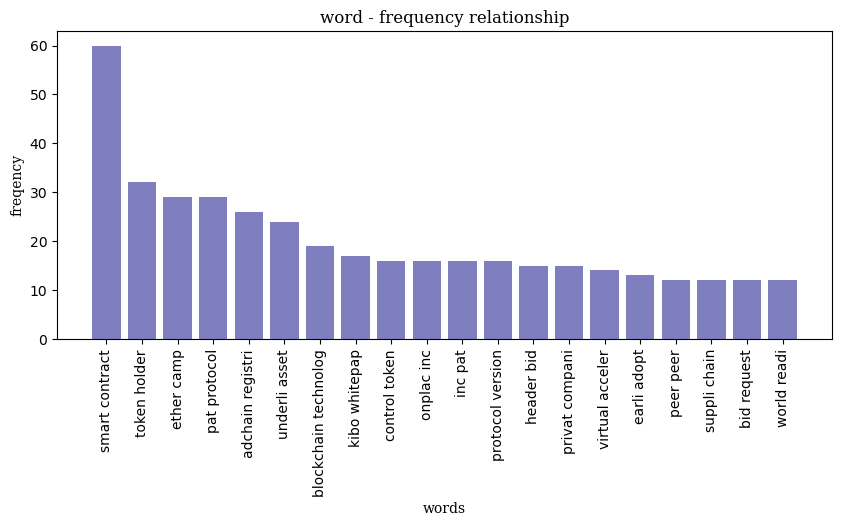

In [19]:
import matplotlib.pyplot as plt
def plot_word_freq(keywords : list, freq : list) -> None :
    plt.figure(figsize = (10, 4))
    plt.bar(keywords, freq, color = 'navy', alpha = .5)
    plt.xlabel('words', fontfamily = 'Serif')
    plt.ylabel('freqency', fontfamily = 'Serif')
    plt.xticks(rotation = 90)
    plt.title('word - frequency relationship', fontsize = 12, fontfamily = 'Serif')
    plt.show()
    
def main() -> None : plot_word_freq(keywords, freq)

if __name__ == '__main__' : main();

#### Problem 5

How many times does a word 'bitcoin' appear?

In [20]:
print(f'{combined.split().count("bitcoin")} times are occurred in text')

21 times are occurred in text


#### Problem 6

How many stemming words are there?

In [21]:
print(f'It can obtain {len(set(stemming_words))} words when duplicates are removed')

It can obtain 2575 words when duplicates are removed


In [22]:
combined

'oct hack ether camp virtual acceler abstract goal creat ideal innov environ startup utilis blockchain technolog releas virtual acceler introduct look histori innov come give peopl incent come creat environ idea connect steven johnson year satoshi nakamoto start bitcoin project nakamoto frst blockchain made possibl complet autonom fnanc system year team blockchain enthusiast start project ethereum revolutionari technolog make possibl creat essenti type autonom direct blockchain base object year start virtual acceler va provid transpar true acceler blockchain develop around world technolog blockchain smart contract allow transpar evalu rank via token allow holder refect convict idea develop crowdfund project becom popular method rais fund earli stage project massolut gener earli backer receiv anyth frst version product better approach enabl identifi valu initi begin evid convict use unit uniform valu platform facilit right earli adopt support idea project initi stage enforc solid reitwi

### Problem 7 ~ 10

IMDB Top 250 movies

We want to analyze IMDB top 250 movies. Create a data frame containing the variables below while doing necessary preprocessing, such as removing dots or parentheses (Use the Preprocessing method introduced in *Homework 2* hint at cyber campus), and then answer the question.

Variables : title, year, runtime, director, stars, rating

Here stars are included up to 4th persons per movie.

In [23]:
import requests
from bs4 import BeautifulSoup
import re
import urllib.request

rank_list = []
title_list = []
year_list = []
runtime_list = []
genre_list = []
director_list = []
actor_list = []
rating_list = []
vote_list = []

url_list = ['https://www.imdb.com/search/title/?groups=top_250&sort=user_rating',
            'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt',
            'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt',
            'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt',
            'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt']

for u in url_list:
    url = u
    req = urllib.request.Request(url)
    html = urllib.request.urlopen(req)
    soup = BeautifulSoup(html, 'html.parser')
    
    rank = soup.find_all('span',{'class':'lister-item-index unbold text-primary'})
    for n in rank:
        rank_list.append(n.text.strip('.'))
        
    title = soup.find_all('h3',{'class':'lister-item-header'})
    for n in title:
        title_list.append(n.find('a').text)
        
    year = soup.find_all('span',{'class':'lister-item-year text-muted unbold'})
    for n in year:
        year_list.append(n.text[-5:-1])
        
    runtime = soup.find_all('span',{'class':'runtime'})
    for n in runtime:
        runtime_list.append(int(n.text[0:n.text.index('min')-1]))
        
    genre = soup.find_all('span',{'class':'genre'})
    for n in genre:
        genre_list.append(n.text.strip('\n '))
        
    director = soup.find_all('p',{'class':''})
    for n in director:
        director_list.append(n.find_all('a')[:-4])
        
    actor = soup.find_all('p',{'class':''})
    for n in actor:
        actor_list.append(n.find_all('a')[-4:])
        
    rating = soup.find_all('div',{'class':'inline-block ratings-imdb-rating'})
    for n in rating:
        rating_list.append(float(n.find('strong').text))
    
    vote_gross = soup.find_all('p',{'class':'sort-num_votes-visible'})
    for n in vote_gross:
        vote_list.append(int(re.sub(',', '', n.find_all('span',{'name':'nv'})[0]['data-value'])))


for i in range(len(director_list)):
    for j in range(len(director_list[i])):
        director_list[i][j] = director_list[i][j].text        
         
for i in range(len(actor_list)):
    for j in range(len(actor_list[i])):
        actor_list[i][j] = actor_list[i][j].text

In [24]:
import pandas as pd
data = pd.DataFrame([title_list, year_list, runtime_list, genre_list, 
                    director_list, actor_list, rating_list, vote_list],
                    index = ['title','year','runtime','genre','director','actor','rating','vote'],
                    columns = rank_list).T
data

,title,year,runtime,genre,director,actor,rating,vote
1,쇼생크 탈출,1994,142,Drama,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",9.3,2809207
2,Daeboo,1972,175,"Crime, Drama",[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Diane K...",9.2,1957640
3,다크 나이트,2008,152,"Action, Crime, Drama",[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.0,2790876
4,쉰들러 리스트,1993,195,"Biography, Drama, History",[Steven Spielberg],"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",9.0,1412171
5,반지의 제왕: 왕의 귀환,2003,201,"Action, Adventure, Drama",[Peter Jackson],"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",9.0,1923078
...,...,...,...,...,...,...,...,...
246,The Incredibles,2004,115,"Animation, Action, Adventure",[Brad Bird],"[Craig T. Nelson, Samuel L. Jackson, Holly Hun...",8.0,782045
247,Dances with Wolves,1990,181,"Adventure, Drama, Western",[Kevin Costner],"[Kevin Costner, Mary McDonnell, Graham Greene,...",8.0,282408
248,알라딘,1992,90,"Animation, Adventure, Comedy","[Ron Clements, John Musker]","[Scott Weinger, Robin Williams, Linda Larkin, ...",8.0,450521
249,사랑의 블랙홀,1993,101,"Comedy, Drama, Fantasy",[Harold Ramis],"[Bill Murray, Andie MacDowell, Chris Elliott, ...",8.0,664497


#### Problem 7

How many times did a star 'Tom Cruise' appear in the IMDB top 250 movies?

In [25]:
star = []
for i in data.actor.values :
    for j in i :
        star.append(j.lower())

In [26]:
star.count('tom cruise')

1

#### Problem 8

What is the average rating of a director 'Christopher Nolan'?

In [27]:
import requests
from bs4 import BeautifulSoup
import re

url1 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&ref_=adv_prv'
url2 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt'
url3 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt'
url4 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt'
url5 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt'
url_list = [url1, url2, url3, url4, url5]

rank_list = []
title_list = []
year_list = []
runtime_list = []
genre_list = []
director_list = []
rating_list = []

for url_i in url_list:
  url = url_i
  req = requests.get(url)
  html = req.text
  soup = BeautifulSoup(html, "html.parser")

  for i in range(0,50):
    rank = re.sub('\.', '', soup.select(".lister-item-index")[i].text)
    title = soup.select(".lister-item-header > a")[i].text
    year = re.sub('\(|\)', '', soup.select(".lister-item-year")[i].text)
    runtime = float(re.sub('min', ' ', soup.select(".runtime")[i].text))
    genre = re.sub('\\n', '', soup.select(".genre")[i].text)
    director = soup.select("p > a:nth-of-type(1)")[i].text
    rating = float(soup.select(".inline-block > strong")[i].text)
    rank_list.append(rank)
    title_list.append(title)
    year_list.append(year)
    runtime_list.append(runtime)
    genre_list.append(genre)
    director_list.append(director)
    rating_list.append(rating)
    # print(i)

In [28]:
year_clean = [i.replace('I ','') for i in year_list]

In [29]:
import pandas as pd
df = pd.DataFrame([title_list, rank_list, runtime_list, genre_list, director_list, rating_list], 
                   index = ['title','rank','runtime','genre','director','rating'], 
                   columns = year_clean).T
df

,title,rank,runtime,genre,director,rating
1994,쇼생크 탈출,1,142.0,Drama,Frank Darabont,9.3
1972,Daeboo,2,175.0,"Crime, Drama",Francis Ford Coppola,9.2
2008,다크 나이트,3,152.0,"Action, Crime, Drama",Christopher Nolan,9.0
1993,쉰들러 리스트,4,195.0,"Biography, Drama, History",Oskar Schindler,9.0
2003,반지의 제왕: 왕의 귀환,5,201.0,"Action, Adventure, Drama",Steven Spielberg,9.0
...,...,...,...,...,...,...
2004,The Incredibles,246,115.0,"Animation, Action, Adventure",Carl Theodor Dreyer,8.0
1990,Dances with Wolves,247,181.0,"Adventure, Drama, Western",Frank Capra,8.0
1992,알라딘,248,90.0,"Animation, Adventure, Comedy",Clyde Bruckman,8.0
1993,사랑의 블랙홀,249,101.0,"Comedy, Drama, Fantasy",Charles Chaplin,8.0


In [30]:
df[df['director'] == 'Christopher Nolan']['rating'].astype(float).mean()

8.5625

#### Problem 9

What is the average rating of a genre 'Action, Advanture, Drama'? (Write up to 1 decimal place. e.g. 3.5)

In [31]:
df['genre'] = df.genre.str.replace(' ','')

In [32]:
df[df['genre'] == 'Action,Adventure,Drama']['rating'].astype(float).mean()

8.7

#### Problem 10

What is the year of which annual average runtime is the longest?

In [33]:
df['runtime'] = df['runtime'].astype(float)

In [34]:
df.groupby(df.index)['runtime'].mean().sort_values(ascending = False)

1978    183.000000
1972    175.000000
1974    166.000000
1984    165.333333
1990    163.000000
           ...    
1925     95.000000
1936     87.000000
1926     78.000000
1921     68.000000
1924     45.000000
Name: runtime, Length: 87, dtype: float64